In [1]:
import pandas as pd
import EDA
import preprocessing

column_credit = ['CustomerID', 'CheckingAccountBalance', 'DebtsPaid', 'SavingsAccountBalance',
                 'CurrentOpenLoanApplications']
df_credit = pd.read_csv('ds-credit.tsv', sep='\s+', header=-1, names=column_credit)

column_app = ['CustomerID', 'LoanPayoffPeriodInMonths', 'LoanReason', 'RequestedAmount', 'InterestRate',
              'Co-Applicant']
df_app = pd.read_csv('ds-app.tsv', sep='\s+', header=-1, names=column_app)

column_borrower = ['CustomerID', 'YearsAtCurrentEmployer', 'YearsInCurrentResidence', 'Age', 'RentOrOwnHome',
                   'TypeOfCurrentEmployment', 'NumberOfDependantsIncludingSelf']
df_borrower = pd.read_csv('ds-borrower.csv', sep='\s+', index_col=False, names=column_borrower, header=0)

column_result = ['CustomerID', 'WasTheLoanApproved']
df_result = pd.read_csv('ds-result.tsv', sep='\s+', header=-1, names=column_result)
df_result = df_result.drop_duplicates()  # Drop the duplicated results

In [22]:
EDA.Info(df_credit).categories()


CustomerID:
[374 346 345 243 662]
int64
(749,)

CheckingAccountBalance:
['debt' 'some' 'none' 'high']
object
(4,)

DebtsPaid:
['paid' 'delayed']
object
(2,)

SavingsAccountBalance:
['some' 'none' 'high' 'medium' 'v.high']
object
(5,)

CurrentOpenLoanApplications:
[2 1 3 4]
int64
(4,)


In [5]:
EDA.Info(df_app).categories()


CustomerID:
[741 439 501 147 821]
int64
(748,)

LoanPayoffPeriodInMonths:
[36 12 30  6 21]
int64
(33,)

LoanReason:
['goods' 'auto' 'repairs' 'busin' 'school']
object
(6,)

RequestedAmount:
[9566 2279 3857  900 1898]
int64
(699,)

InterestRate:
[2 4 1 3]
int64
(4,)

Co-Applicant:
['none' 'guarant' 'co-app']
object
(3,)


In [6]:
EDA.Info(df_borrower).categories()


CustomerID:
['765' '668' '68' '805' '495']
object
(750,)

YearsAtCurrentEmployer:
['1' '4' '10+' '7' '0']
object
(6,)

YearsInCurrentResidence:
['1' '4' '2' '3' 'Age']
object
(5,)

Age:
['46' '49' '57' '41' '24']
object
(54,)

RentOrOwnHome:
['rent' 'owned' 'free' 'CurEmp']
object
(4,)

TypeOfCurrentEmployment:
['skilled' 'unskill' 'self' 'none' 'Dep']
object
(5,)

NumberOfDependantsIncludingSelf:
[ 1.  2. nan]
float64
(3,)


In [7]:
EDA.Info(df_result).categories()


CustomerID:
['1' '2' '3' '4' '5']
object
(752,)

WasTheLoanApproved:
['Y' 'N' '1' 'WasTheLoanApproved' 'rows)']
object
(5,)


In [2]:
vs = EDA.Visual(df_credit)

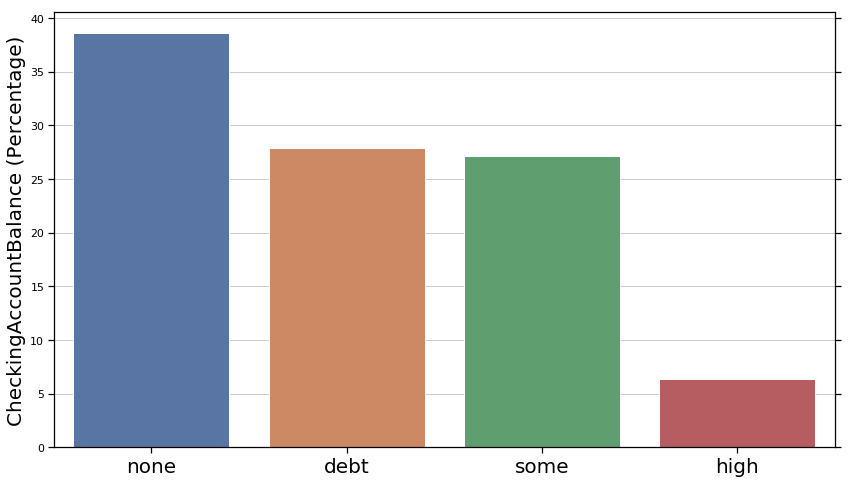

In [3]:
vs.percentage('CheckingAccountBalance')

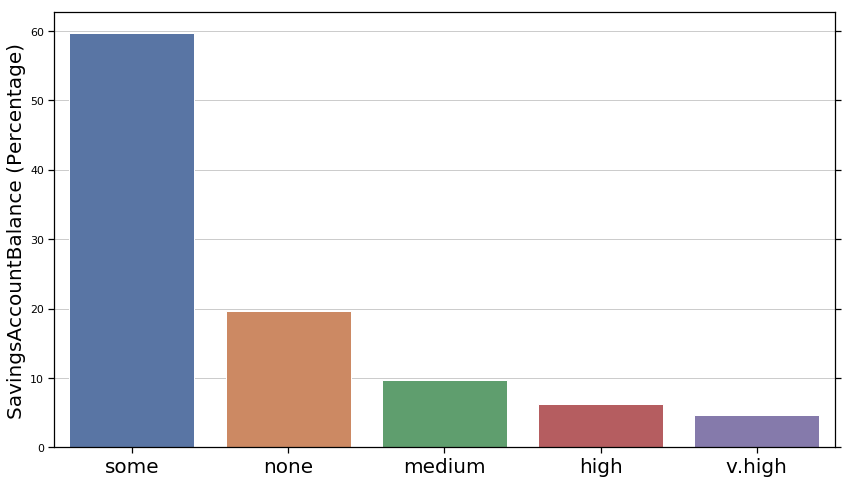

In [7]:
vs.percentage('SavingsAccountBalance')

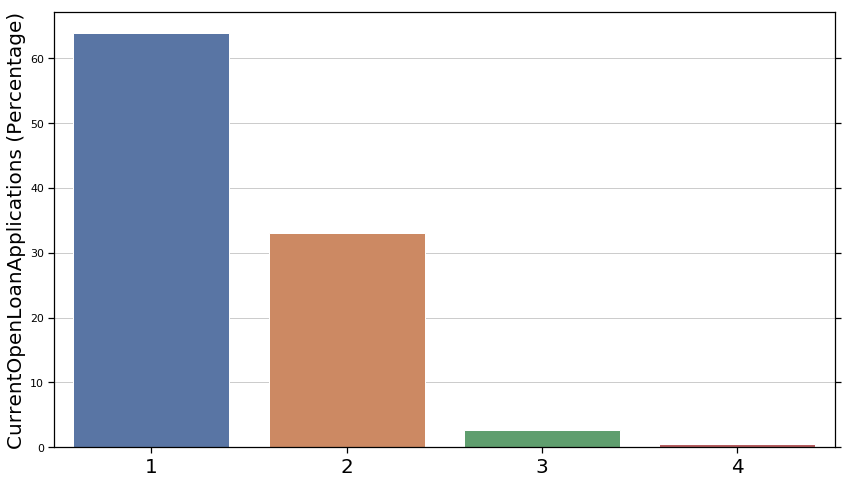

In [8]:
vs.percentage('CurrentOpenLoanApplications')

In [4]:
vs = EDA.Visual(df_app)

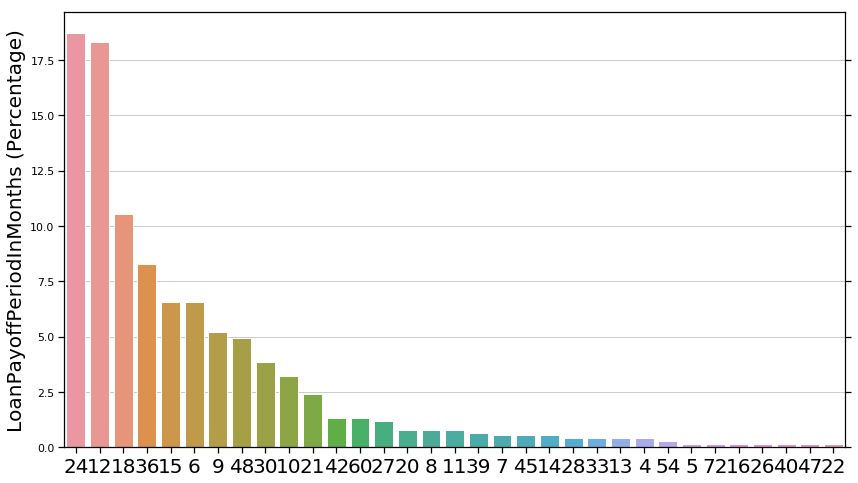

In [5]:
vs.percentage('LoanPayoffPeriodInMonths')

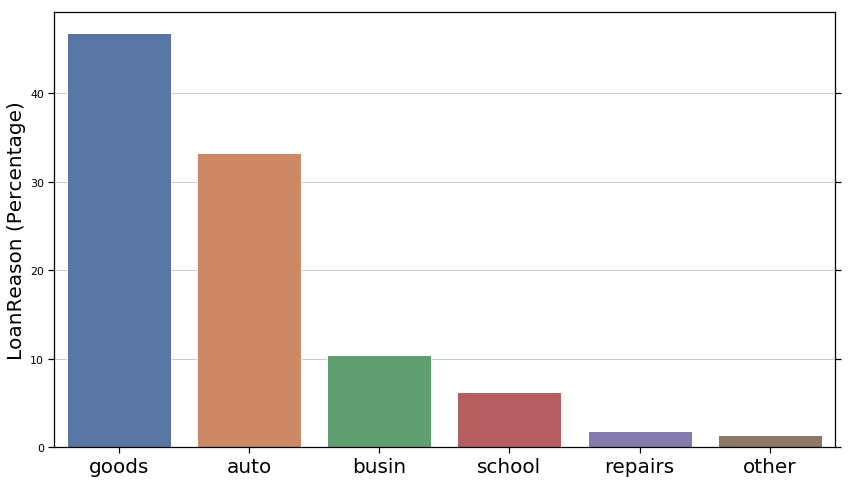

In [6]:
vs.percentage('LoanReason')

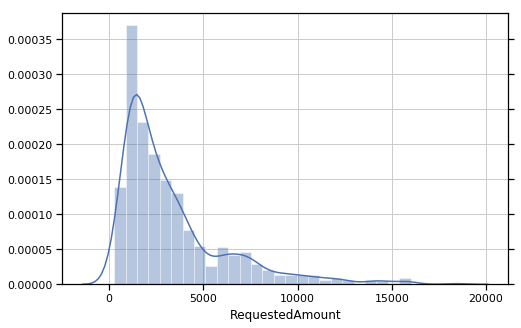

count      748.000000
mean      3337.471925
std       2899.957905
min        276.000000
25%       1369.750000
50%       2341.500000
75%       4070.250000
max      18424.000000
Name: RequestedAmount, dtype: float64


In [9]:
vs.set_size(8, 5)
vs.hist('RequestedAmount')

In [3]:
na = preprocessing.NA(df_borrower)
na.to_num('Age')
df_borrower = na.drop('CustomerID')
vs = EDA.Visual(df_borrower)

In [15]:
df_borrower.head()

,CustomerID,YearsAtCurrentEmployer,YearsInCurrentResidence,Age,RentOrOwnHome,TypeOfCurrentEmployment,NumberOfDependantsIncludingSelf
0,765,1,1,46,rent,skilled,1.0
1,668,4,4,49,owned,skilled,1.0
2,68,10+,4,57,rent,skilled,1.0
3,805,4,2,41,owned,skilled,1.0
4,495,7,4,24,rent,skilled,1.0


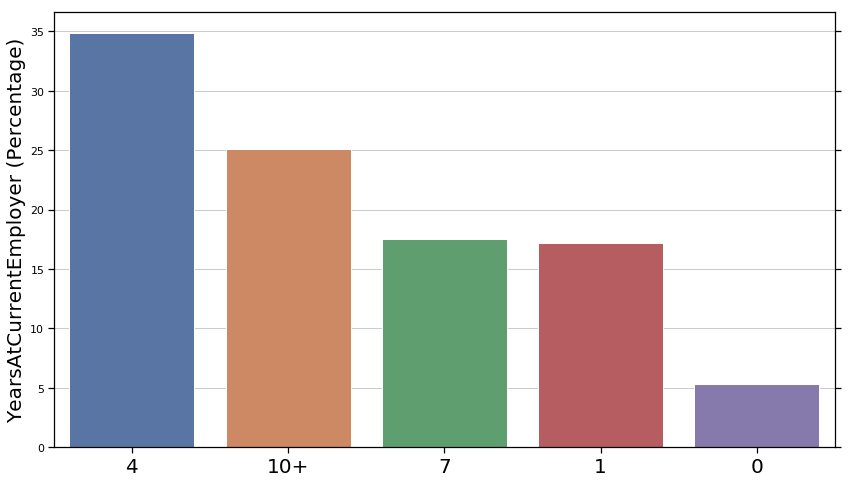

In [16]:
vs.percentage('YearsAtCurrentEmployer')

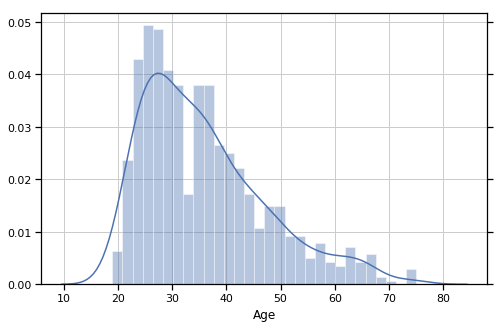

count    749.000000
mean      35.881175
std       11.373133
min       19.000000
25%       27.000000
50%       34.000000
75%       42.000000
max       75.000000
Name: Age, dtype: float64


In [12]:
vs.set_size(8, 5)
vs.hist('Age')

In [2]:
na = preprocessing.NA(df_borrower)
na.to_num('CustomerID')
df_borrower = na.drop('CustomerID')

na = preprocessing.NA(df_result)
na.to_num('CustomerID')
df_result = na.drop('CustomerID')

mg = preprocessing.Merge([df_credit, df_app, df_borrower, df_result])
df_all = mg.transform('CustomerID')


CheckingAccountBalance:
0.11778563015312132

DebtsPaid:
0.11778563015312132

SavingsAccountBalance:
0.11778563015312132

CurrentOpenLoanApplications:
0.11778563015312132

LoanPayoffPeriodInMonths:
0.11896348645465253

LoanReason:
0.11896348645465253

RequestedAmount:
0.11896348645465253

InterestRate:
0.11896348645465253

Co-Applicant:
0.11896348645465253

YearsAtCurrentEmployer:
0.11778563015312132

YearsInCurrentResidence:
0.11778563015312132

Age:
0.11778563015312132

RentOrOwnHome:
0.11778563015312132

TypeOfCurrentEmployment:
0.11778563015312132

NumberOfDependantsIncludingSelf:
0.11778563015312132

WasTheLoanApproved:
0.1166077738515901


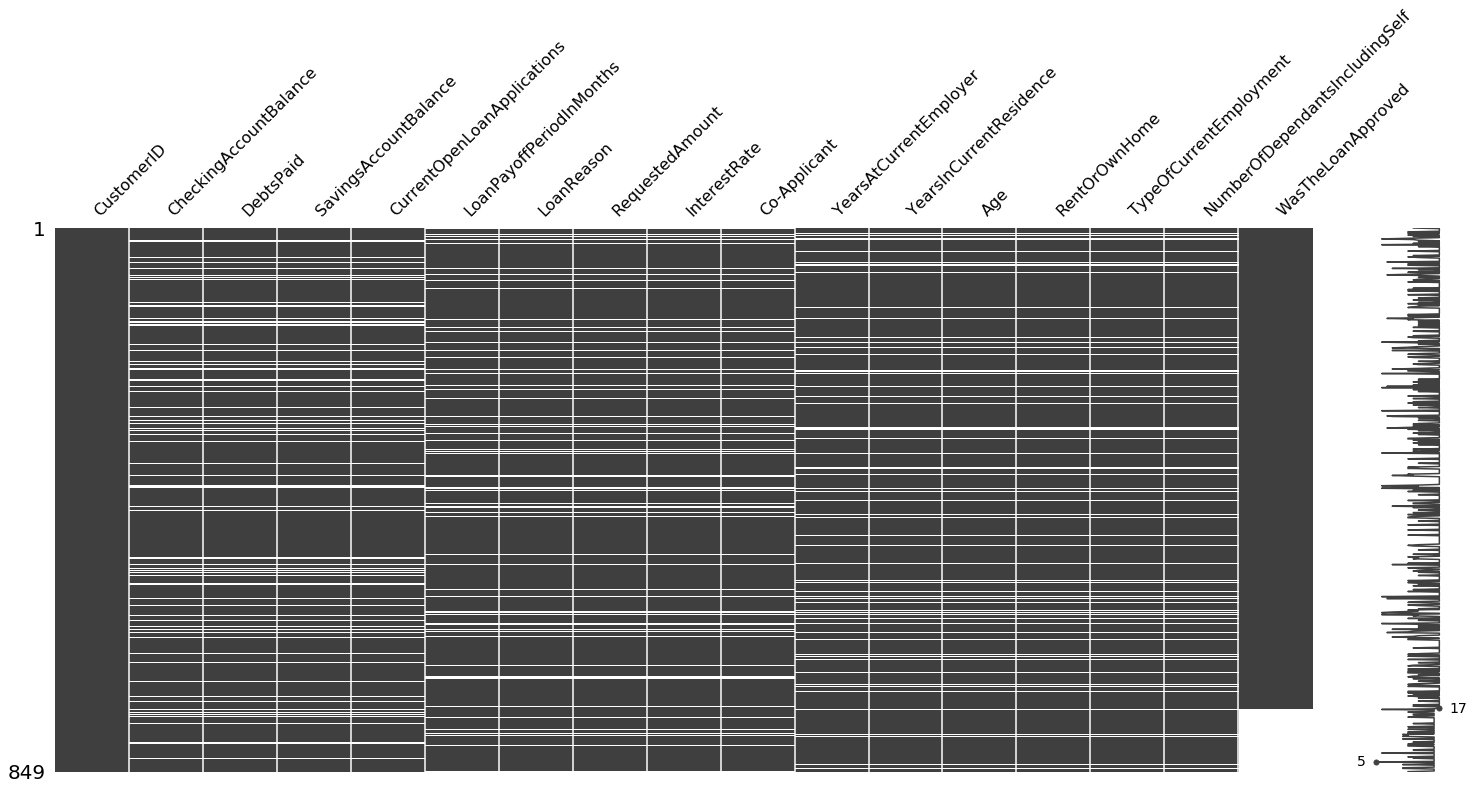

In [3]:
info = EDA.Info(df_all)
info.missing()

In [9]:
df_corr = df_all.loc[(df_all.WasTheLoanApproved == 'Y') | (df_all.WasTheLoanApproved == 'N')].dropna()

In [10]:
df_corr = preprocessing.Encode().ordinal(df_corr)

In [11]:
vs = EDA.Visual(df_corr)

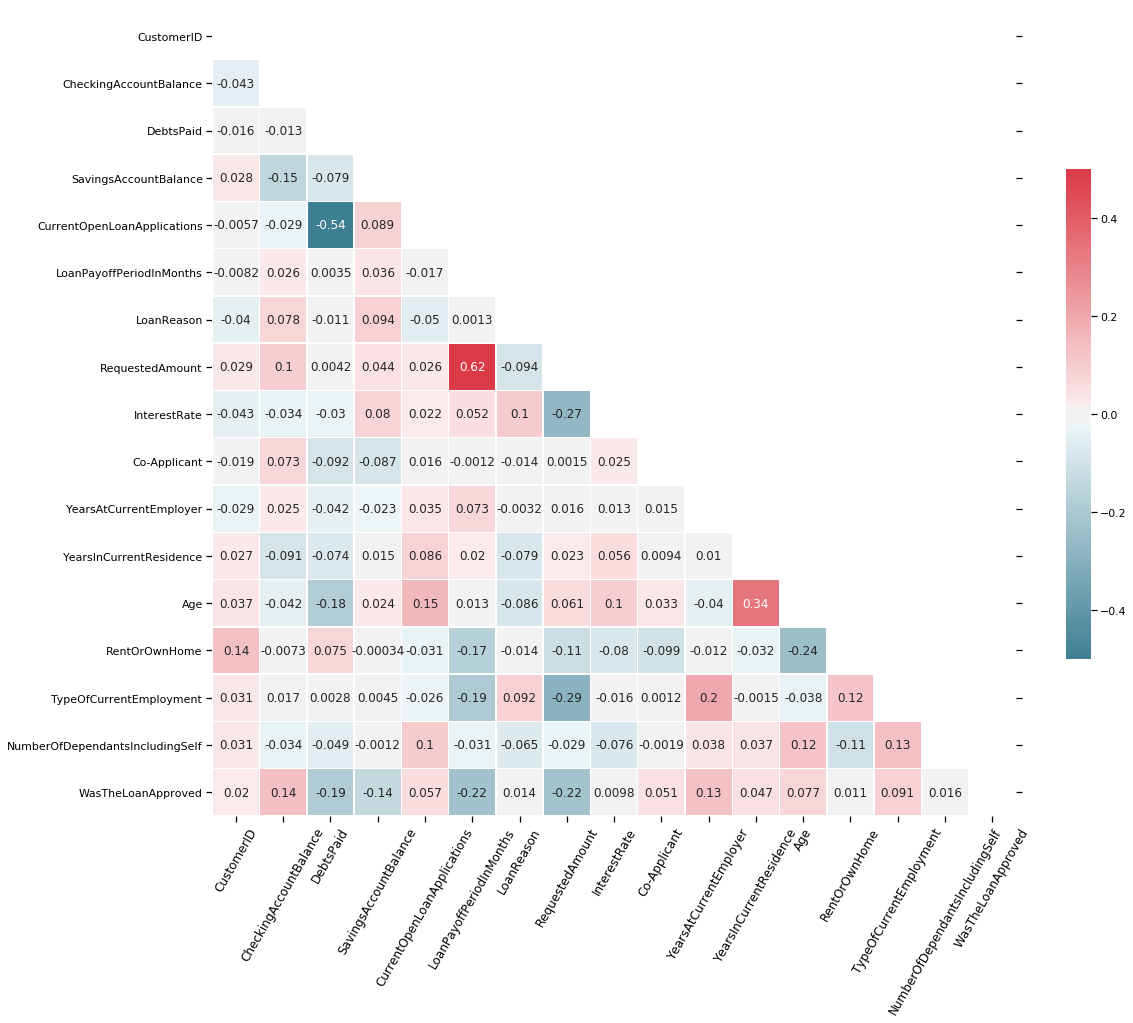

In [12]:
vs.set_size(18,18)
vs.correlation(vmax=.5, vmin=-.5, center=0, rotation=60)

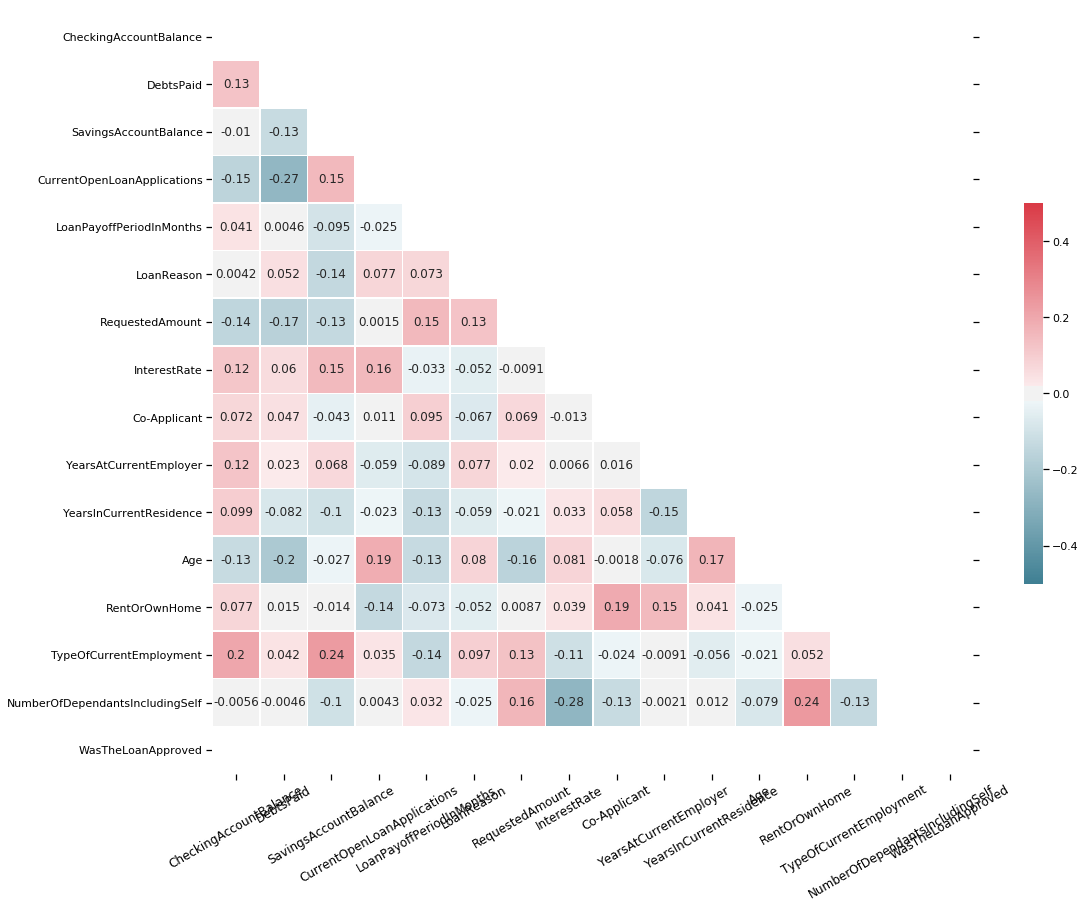

In [71]:
df = a.corr() - b.corr()
vmax=.5
vmin=-0.5
center=0
rotation=30
fontsize=12
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(18,14))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

corr = sns.heatmap(df, mask=mask, cmap=cmap, vmax=vmax, vmin=vmin, center=center,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={'fontsize':fontsize})
corr.set_xticklabels(corr.get_xticklabels(), rotation=rotation, fontsize=fontsize)
plt.show()

In [13]:
vs = EDA.Visual(df_corr)

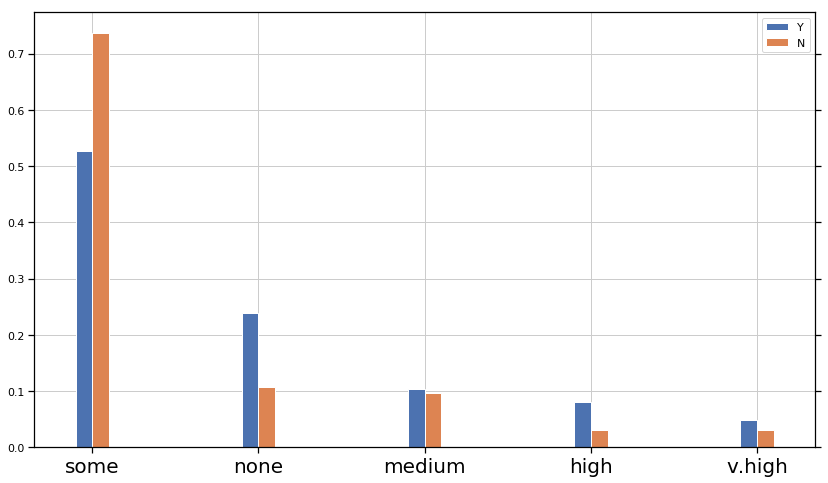

In [14]:
vs.compare('SavingsAccountBalance','WasTheLoanApproved', rotation=0, fontsize=20)

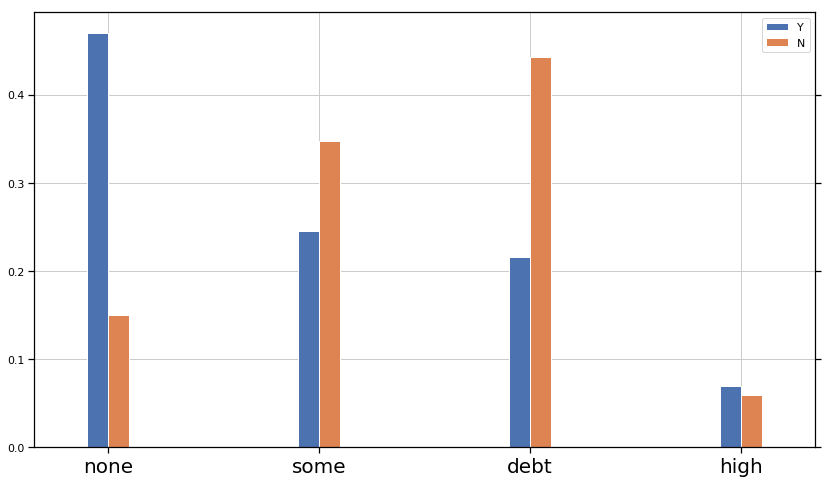

In [15]:
vs.compare('CheckingAccountBalance','WasTheLoanApproved', rotation=0, fontsize=20)

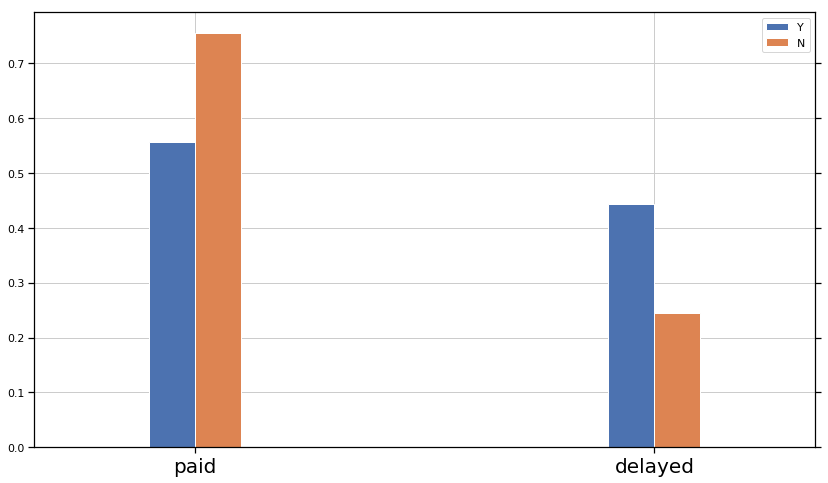

In [16]:
vs.compare('DebtsPaid','WasTheLoanApproved', rotation=0, fontsize=20)

In [13]:
df_corr.head()

,CustomerID,CheckingAccountBalance,DebtsPaid,SavingsAccountBalance,CurrentOpenLoanApplications,LoanPayoffPeriodInMonths,LoanReason,RequestedAmount,InterestRate,Co-Applicant,YearsAtCurrentEmployer,YearsInCurrentResidence,Age,RentOrOwnHome,TypeOfCurrentEmployment,NumberOfDependantsIncludingSelf,WasTheLoanApproved
228,2,none,delayed,none,2.0,9.0,goods,3074.0,1.0,none,4,2,33,owned,skilled,2.0,Y
608,3,high,delayed,high,3.0,12.0,auto,939.0,4.0,none,7,2,28,owned,skilled,1.0,N
165,4,none,paid,high,1.0,9.0,auto,2507.0,2.0,none,10+,4,51,free,unskill,1.0,Y
250,5,none,delayed,some,2.0,18.0,goods,2238.0,2.0,none,4,1,25,owned,skilled,1.0,Y
618,6,none,delayed,some,2.0,24.0,repairs,5507.0,3.0,none,10+,4,44,free,skilled,1.0,Y


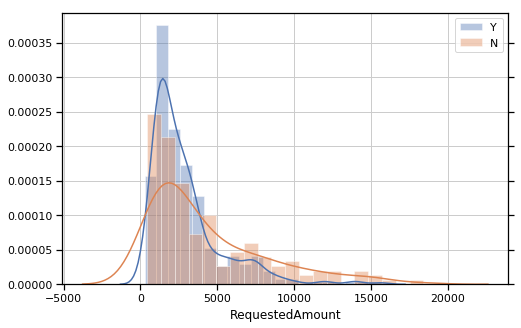

In [18]:
vs.set_size(8,5)
vs.dist('RequestedAmount', 'WasTheLoanApproved')

In [160]:
df_corr = df_all.loc[(df_all.WasTheLoanApproved == 'Y') | (df_all.WasTheLoanApproved == 'N')].dropna()

In [121]:
df = df_corr.drop('CustomerID',1)

In [55]:
df = preprocessing.Encode().ordinal(df)

In [48]:
df_y = df.loc[(df.WasTheLoanApproved == 1) ]
df_n = df.loc[(df.WasTheLoanApproved == 0) ]

In [24]:
a = preprocessing.Encode().ordinal(df_y)
b = preprocessing.Encode().ordinal(df_n)

In [57]:
a = df.loc[(df.WasTheLoanApproved == 1) ]
b = df.loc[(df.WasTheLoanApproved == 0) ]

In [35]:
import matplotlib.pyplot as plt
import numpy as np

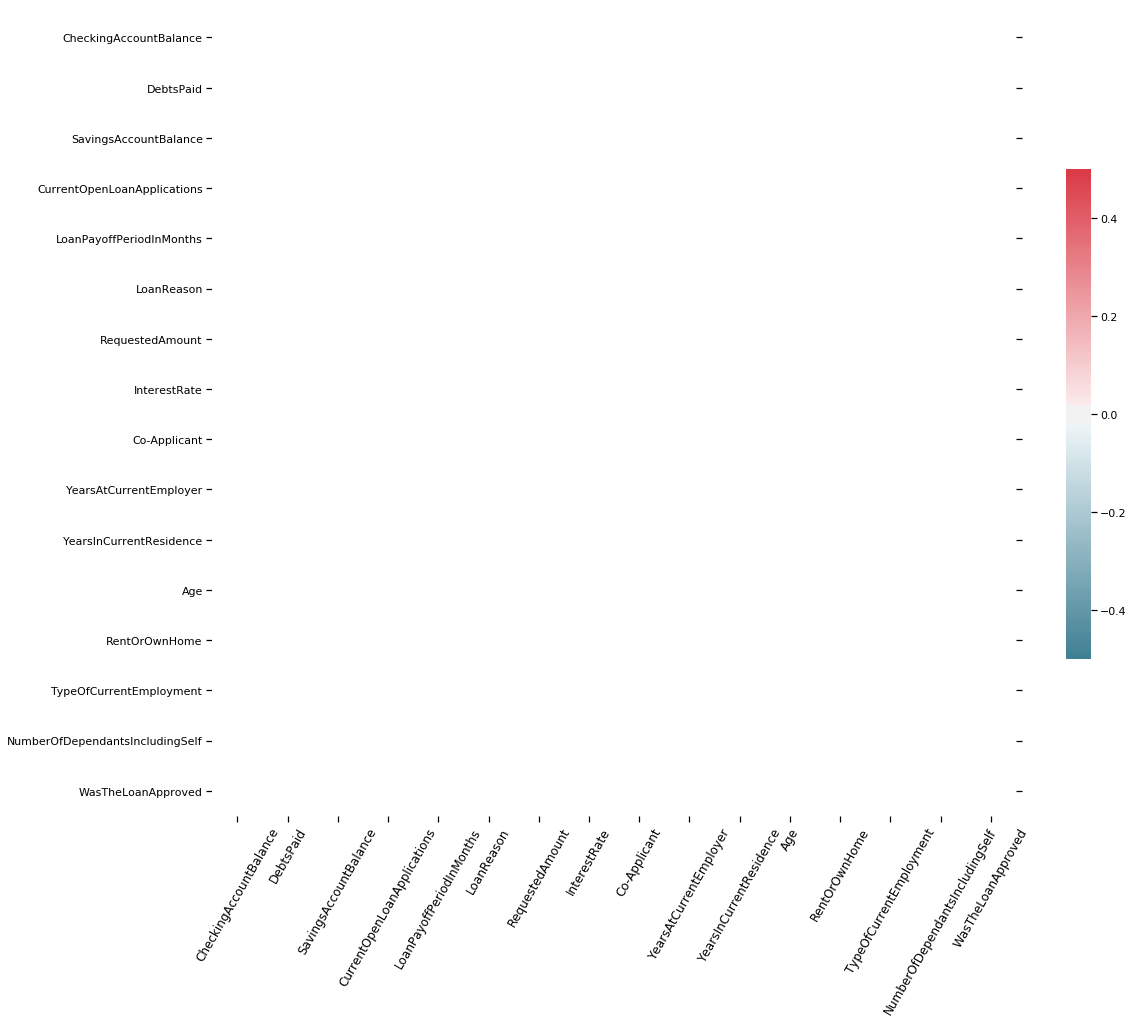

In [194]:
vs = EDA.Visual(preprocessing.Encode().ordinal(df_y).corr())
vs.set_size(18,18)
vs.correlation(vmax=.5, vmin=-.5, center=0, rotation=60)

/home/tianyi/Documents/data_practice/LoanRisk/preprocessing.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[c] = enc.fit_transform(data[c])


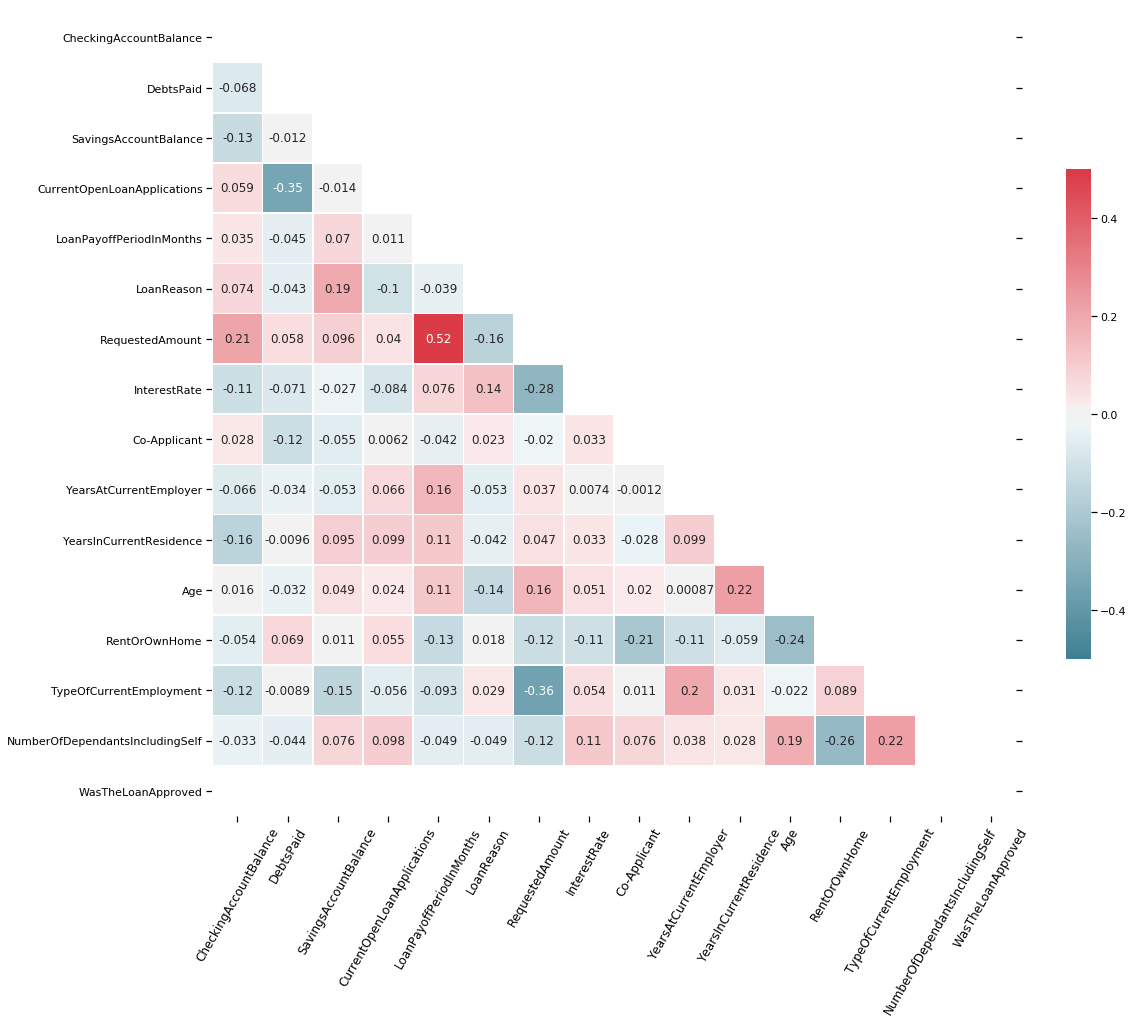

In [23]:
vs = EDA.Visual(preprocessing.Encode().ordinal(df_n))
vs.set_size(18,18)
vs.correlation(vmax=.5, vmin=-.5, center=0, rotation=60)

In [19]:
import seaborn as sns

In [184]:
df_corr = df_all.loc[(df_all.WasTheLoanApproved == 'Y') | (df_all.WasTheLoanApproved == 'N')].dropna()
df_corr = df_corr.drop('CustomerID', 1)

In [185]:
df_v = preprocessing.Encode().ordinal(df_corr)
df_v['RequestedAmount'] = np.log(df_v['RequestedAmount'])
df_v['Age'] = np.log(df_v['Age']+.1)
df_v['LoanPayoffPeriodInMonths'] = df_v['LoanPayoffPeriodInMonths']/12

In [190]:
from sklearn.manifold import TSNE
ts = TSNE(n_components=2, verbose=30, n_iter=500)
tsf = ts.fit_transform(df_v.values[:, 1:17])
t_visual = pd.DataFrame(df_v.iloc[:, -1])
t_visual['x'] = tsf[:,0]
t_visual['y'] = tsf[:,1]
t_visual.columns = ['Colors', 'x', 'y']
t_visual = t_visual.join(df_all.loc[(df_all.WasTheLoanApproved == 'Y') | (df_all.WasTheLoanApproved == 'N')].dropna())

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 514 samples in 0.001s...
[t-SNE] Computed neighbors for 514 samples in 0.017s...
[t-SNE] Computed conditional probabilities for sample 514 / 514
[t-SNE] Mean sigma: 1.273056
[t-SNE] Computed conditional probabilities in 0.023s
[t-SNE] Iteration 50: error = 69.1894684, gradient norm = 0.5093361 (50 iterations in 1.356s)
[t-SNE] Iteration 100: error = 71.3996964, gradient norm = 0.4779590 (50 iterations in 1.503s)
[t-SNE] Iteration 150: error = 71.4085083, gradient norm = 0.4811117 (50 iterations in 1.551s)
[t-SNE] Iteration 200: error = 71.4917450, gradient norm = 0.4849668 (50 iterations in 1.524s)
[t-SNE] Iteration 250: error = 71.4991684, gradient norm = 0.4731659 (50 iterations in 1.508s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.499168
[t-SNE] Iteration 300: error = 1.3739719, gradient norm = 0.0034841 (50 iterations in 1.213s)
[t-SNE] Iteration 350: error = 1.2995644, gradient norm = 0.0007537 (

In [191]:
import bokeh.plotting as bp
from bokeh.models import HoverTool
from bokeh.models import LinearColorMapper
from bokeh.plotting import figure, show, output_file, save
from bokeh.io import output_notebook
output_notebook()

color_mapper = LinearColorMapper(palette='RdBu3', low=0, high=1)
plot_ts = bp.figure(plot_width=800, plot_height=600,
                       title="Visual",
    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
    x_axis_type=None, y_axis_type=None, min_border=1)

plot_ts.scatter('x','y',size=6, line_color="#34495e", color={'field': 'Colors', 'transform': color_mapper},source=t_visual)
hover = plot_ts.select(dict(type=HoverTool))
hover.tooltips={'Cluster':'@WasTheLoanApproved',
               'CheckingAccountBalance': '@CheckingAccountBalance',
               'DebtsPaid': '@DebtsPaid',
               'SavingsAccountBalance': '@SavingsAccountBalance',
               'RequestedAmount': '@RequestedAmount',
                'YearsAtCurrentEmployer': '@YearsAtCurrentEmployer'
               }

plot_ts.title.text_font_size = '8pt'
# Save
output_notebook()
show(plot_ts)
# output_file("t4.html")
# save(plot_ts)

Loading BokehJS ...

Loading BokehJS ...

In [134]:
t_visual.columns


Index(['WasTheLoanApproved', 'x', 'y'], dtype='object')